# TP Visualización

## Carga de datos

In [1]:
import json
import pandas as pd

In [2]:
json_path = './MC3/mc3.json'

In [3]:
# open json file
with open(json_path) as json_file:
    data = json.load(json_file)

In [4]:
# Convert list of dictionaries to DataFrame
df_nodes = pd.DataFrame(data['nodes'])
df_links = pd.DataFrame(data['links'])

### Nodes: Entitites -> Persons, Companies

In [5]:
# Entidades -> partir en personas y otra en organizaciones
df_nodes['type'].value_counts()

type
Entity.Person                           50356
Entity.Organization.Company              7927
Entity.Person.CEO                        1293
Entity.Organization.FishingCompany        600
Entity.Organization.LogisticsCompany      311
Entity.Organization.FinancialCompany       23
Entity.Organization.NewsCompany             5
Entity.Organization.NGO                     5
Name: count, dtype: int64

De los nodos se tienen entidades:
- Person
  - CEO
- Organization
  - FishingCompany
  - LogisticsCompany
  - FinancialCompany
  - NewsCompany
  - NGO

In [6]:
# DataFrames for each type of node
Organization_Company = df_nodes[df_nodes['type'] == 'Entity.Organization.Company']
Organization_FishingCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.FishingCompany']
Organization_LogisticsCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.LogisticsCompany']
Organization_FinancialCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.FinancialCompany']
Organization_NewsCompany = df_nodes[df_nodes['type'] == 'Entity.Organization.NewsCompany']
Organization_NGO = df_nodes[df_nodes['type'] == 'Entity.Organization.NGO']
Person = df_nodes[df_nodes['type'] == 'Entity.Person']
Person_CEO = df_nodes[df_nodes['type'] == 'Entity.Person.CEO']


### Links -> Events, Relationships

In [7]:
# Entidades -> partir en personas y otra en organizaciones
df_links['type'].value_counts()

type
Event.Owns.Shareholdership         39378
Event.Owns.BeneficialOwnership     21531
Event.WorksFor                     14817
Relationship.FamilyRelationship       91
Name: count, dtype: int64

In [8]:
Event_Owns_Shareholdership = df_links[df_links['type'] == 'Event.Owns.Shareholdership']
Event_Owns_BeneficialOwnership = df_links[df_links['type'] == 'Event.Owns.BeneficialOwnership']
Event_WorksFor = df_links[df_links['type'] == 'Event.WorksFor']
Relationship_FamilyRelationship = df_links[df_links['type'] == 'Relationship.FamilyRelationship']

## Analisis de Sergio

Busco reproducir lo que Sergio ya hizo, que se resume en https://docs.google.com/document/d/1euxyecWxbh7oyuMJXJ91I9RWoLOvhvsFhnvgGMrR5MA/edit?pli=1

### Búsqueda  en las aristas (links)

### 'SouthSeaFood Express Corp'

SouthSeafood no tiene acciones de otras empresas.

In [9]:
# show lines where source is 'SouthSeafood Express Corp'
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='SouthSeafood Express Corp']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date


-> **Cambio de dueño**: "SouthSeaFood Express Corp" el 25/05/35 pasa de manos de "AguaLeska Transit N.V." a "Tainamarine Fishing Co".


In [27]:
# show lines where target is 'SouthSeafood Express Corp'
Event_Owns_Shareholdership[Event_Owns_Shareholdership['target']=='SouthSeafood Express Corp']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75663,2033-10-29T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,AguaLeska Transit N.V.,SouthSeafood Express Corp,0,2035-05-25T00:00:00
75699,2035-05-25T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,Tainamarine Fishing Co,SouthSeafood Express Corp,0,NaN


No figura entre todas las compañías. **RARO**

In [25]:
# Is "SouthSeaFood Express Corp" is in Organization.Company?
Organization_Company[Organization_Company['id'] == 'SouthSeafood Express Corp']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob


Pero sí figura entre las de pesca.

In [26]:
# Is "SouthSeaFood Express Corp" is in Organization.FishingCompany?
Organization_FishingCompany[Organization_FishingCompany['id'] == 'SouthSeafood Express Corp']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60463,Entity.Organization.FishingCompany,Oceanus,Fishing and other related activities,Luce du Adam,Achille Forza,2032-11-05T00:00:00,6529.36,Offering comprehensive fishing solutions and r...,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,SouthSeafood Express Corp,NaN


FishEye no tiene identificado quién es el dueño final de 'SouthSeafood Express Corp'.

In [54]:
# show lines where source is 'SouthSeafood Express Corp' in Event_Owns_BeneficialOwnership
Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['target']=='SouthSeafood Express Corp']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date


### 'Tainamarine Fishing Co', los nuevos dueños

Tainamarine no es dueña de otra empresa.

In [23]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='Tainamarine Fishing Co']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75699,2035-05-25T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,Tainamarine Fishing Co,SouthSeafood Express Corp,0,NaN


"V. Miesel Shipping" compra o crea a 'Tainamarine Fishing Co' **solo 5 días antes** de que esta compra a 'SouthSeaFood Express Corp'.

In [24]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['target']=='Tainamarine Fishing Co']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75700,2035-05-20T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,V. Miesel Shipping,Tainamarine Fishing Co,0,NaN


'Tainamarine Fishing Co' es una compañía de pesca.

In [31]:
Organization_FishingCompany[Organization_FishingCompany['id'] == 'Tainamarine Fishing Co']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60467,Entity.Organization.FishingCompany,Oceanus,Fish and seafood products,Jeffrey Wilson,Mario Sandoval,2035-05-20T00:00:00,77826.74,Offering an extensive range of premium fish an...,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,Tainamarine Fishing Co,NaN


### 'V. Miesel Shipping', dueña de 'TainaMarine Fishing Co.'

'V. Miesel Shipping' no es dueña de otras compañías.

In [12]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='V. Miesel Shipping']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75700,2035-05-20T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,V. Miesel Shipping,Tainamarine Fishing Co,0,NaN


'Namorna Transit Ltd' compra 'V. Miesel Shipping' **solo 2 días antes** de que esta compre 'Tainamarine Fishing Co'

In [14]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['target']=='V. Miesel Shipping']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75680,2035-05-18T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,Namorna Transit Ltd,V. Miesel Shipping,0,NaN


No es de pesca 'V. Miesel Shipping'.

In [32]:
Organization_FishingCompany[Organization_FishingCompany['id'] == 'V. Miesel Shipping']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob


Vende 'Seafood products' la compañía 'V. Miesel Shipping'

In [33]:
# Is "SouthSeaFood Express Corp" is in Organization.Company?
Organization_Company[Organization_Company['id'] == 'V. Miesel Shipping']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60468,Entity.Organization.Company,Nalakimani,Seafood products,Elise Hauser,Helena Abraham Valverde,2035-05-18T00:00:00,29757.05,Your trusted source for a diverse selection of...,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,V. Miesel Shipping,NaN


### 'Namorna Transit Ltd' dueña de 'V. Miesel Shipping'

'Namorna Transit Ltd' no es dueña de otras compañías.

In [16]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='Namorna Transit Ltdb']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75680,2035-05-18T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,Namorna Transit Ltd,V. Miesel Shipping,0,NaN


El mismo día que 'Namorna Transit Ltd' adquiere 'V. Miesel Shipping' es adquirida por 'StichtingMarine Shipping Company'.

In [17]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['target']=='Namorna Transit Ltd']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75698,2035-05-18T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,StichtingMarine Shipping Company,Namorna Transit Ltd,0,NaN


Vende 'Seafood products' la compañía 'Namorna Transit Ltd'

In [36]:
# Is "SouthSeaFood Express Corp" is in Organization.Company?
Organization_Company[Organization_Company['id'] == 'Namorna Transit Ltd']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60448,Entity.Organization.Company,Nalakimani,Seafood products,Sanaa El-Amin,Donald Carson,2035-05-18T00:00:00,29862.48,Bringing the bounty of the ocean to your table...,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,Namorna Transit Ltd,NaN


### 'StichtingMarine Shipping Company' dueña de 'Namorna Transit Ltd'

'StichtingMarine Shipping Company' antes de ser dueña de 'Namorna Transit Ltd' lo fue de 'AguaLeska Transit N.V.', la dueña anterior de 'SouthSeafood Express Corp'

In [18]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='StichtingMarine Shipping Company']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75697,2029-08-17T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,StichtingMarine Shipping Company,AguaLeska Transit N.V.,0,2035-06-02T00:00:00
75698,2035-05-18T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-06-15T00:00:00,2035-06-15T00:00:00,Oceanus Corporations Monthly - May '35,Manual Entry,StichtingMarine Shipping Company,Namorna Transit Ltd,0,NaN


Un año antes de que 'StichtingMarine Shipping Company' adquiera 'AguaLeska Transit N.V.' fue adquirida por 'SavanetaCreek Solutions NV'.  
'StichtingMarine Shipping Company' es adquirida por 'Liam Conti' el mes siguiente de que 'SouthSeafood Express Corp' pasa a manos de 'Tainamarine Fishing Co'. 

In [38]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['target']=='StichtingMarine Shipping Company']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75694,2028-08-24T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,SavanetaCreek Solutions NV,StichtingMarine Shipping Company,0,NaN
75724,2035-06-10T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-07-15T00:00:00,2035-07-15T00:00:00,Oceanus Corporations Monthly - Jun '35,Manual Entry,Liam Conti,StichtingMarine Shipping Company,0,NaN


Está entre las compañías de pesca 'StichtingMarine Shipping Company'

In [39]:
Organization_FishingCompany[Organization_FishingCompany['id'] == 'StichtingMarine Shipping Company']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob
60465,Entity.Organization.FishingCompany,Oceanus,Fish and seafood products,Tammy Lane,Andrea Gallagher,2031-05-01T00:00:00,9652.46,Bringing the finest selection of responsibly s...,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,StichtingMarine Shipping Company,NaN


No figura entre otras compañías 'StichtingMarine Shipping Company'

In [37]:
# Is "SouthSeaFood Express Corp" is in Organization.Company?
Organization_Company[Organization_Company['id'] == 'StichtingMarine Shipping Company']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob


Los dueños de 'StichtingMarine Shipping Company' desde 2031-05-01, 'Liam Conti' (key 1) y 'Fintan Park' (key 0).

In [46]:
Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['target']=='StichtingMarine Shipping Company']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75725,2031-05-01T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Liam Conti,StichtingMarine Shipping Company,1,NaN
75731,2031-05-01T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Fintan Park,StichtingMarine Shipping Company,0,NaN


### 'SavanetaCreek Solutions NV'

También dueños de 'Oka Seafood Shipping Ges.m.b.H.'

In [40]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='SavanetaCreek Solutions NV']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75694,2028-08-24T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,SavanetaCreek Solutions NV,StichtingMarine Shipping Company,0,NaN
75695,2028-03-22T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,SavanetaCreek Solutions NV,Oka Seafood Shipping Ges.m.b.H.,0,NaN


In [45]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['target']=='SavanetaCreek Solutions NV']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75728,2033-09-24T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Fintan Park,SavanetaCreek Solutions NV,0,NaN
75732,2029-08-23T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Rafael Sanchez,SavanetaCreek Solutions NV,0,NaN


Como compañía no figura ni entre las de pesca ni de las otras.

In [43]:
Organization_FishingCompany[Organization_FishingCompany['id'] == 'SavanetaCreek Solutions NV']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob


In [42]:
# Is "SouthSeaFood Express Corp" is in Organization.Company?
Organization_Company[Organization_Company['id'] == 'SavanetaCreek Solutions NV']

,type,country,ProductServices,PointOfContact,HeadOfOrg,founding_date,revenue,TradeDescription,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,id,dob


In [51]:
Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['target']=='SavanetaCreek Solutions NV']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75729,2031-01-15T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Fintan Park,SavanetaCreek Solutions NV,1,NaN


### 'AguaLeska Transit N.V.' antiguos dueños de 'SouthSeaFood Express Corp'

No es dueña de otra compañía.

In [19]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='AguaLeska Transit N.V.']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75663,2033-10-29T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,AguaLeska Transit N.V.,SouthSeafood Express Corp,0,2035-05-25T00:00:00


Adquirida por 'StichtingMarine Shipping Company' en 2029-08-17.  
Un año antes adquirida par 'Liam Conti' 

In [20]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['target']=='AguaLeska Transit N.V.']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75697,2029-08-17T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,StichtingMarine Shipping Company,AguaLeska Transit N.V.,0,2035-06-02T00:00:00
75723,2028-06-10T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Liam Conti,AguaLeska Transit N.V.,0,2035-05-15T00:00:00


FishEye no tienen registrado quién es el dueño último de 'AguaLeska Transit N.V.'

In [49]:
Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['target']=='AguaLeska Transit N.V.']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date


### 'Liam Conti'

No tiene acciones en otras compañías de las ya identificadas.

In [58]:
Event_Owns_Shareholdership[Event_Owns_Shareholdership['source']=='Liam Conti']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75723,2028-06-10T00:00:00,Event.Owns.Shareholdership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Liam Conti,AguaLeska Transit N.V.,0,2035-05-15T00:00:00
75724,2035-06-10T00:00:00,Event.Owns.Shareholdership,Niklaus Oberon,2035-07-15T00:00:00,2035-07-15T00:00:00,Oceanus Corporations Monthly - Jun '35,Manual Entry,Liam Conti,StichtingMarine Shipping Company,0,NaN


No es dueño último de otra compañía de las ya identificadas.

In [56]:
Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['source']=='Liam Conti']

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
75725,2031-05-01T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Liam Conti,StichtingMarine Shipping Company,1,NaN


### Beneficial Ownership

I guess that mergers and acquisitions should be related to dates. Are dates in the data?

In [9]:
Event_Owns_BeneficialOwnership.head(5)

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
335,2018-05-10T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Laura Newman,Briggs-Wilson,0,NaN
338,2013-11-30T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Jillian Morales,Briggs-Wilson,0,NaN
339,2012-05-04T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Anna Bailey,Briggs-Wilson,0,NaN
340,2007-03-16T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Dawn King,Briggs-Wilson,0,NaN
341,2016-09-28T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Dawn King,Fleming-Diaz,0,NaN


What is "beneficial ownership"?
> In domestic and international commercial law, a beneficial owner is a natural person or persons who ultimately owns or controls an interest in a legal entity or arrangement, such as a company, a trust, or a foundation.[1] Legal owners (i.e. the owners on the record), commonly described as the "registered owners", may hold those interests as beneficial owners or for the benefit of someone else, in which case they may be described as a "nominee".  
>  
> Wikipedia contributors, "Beneficial ownership," Wikipedia, The Free Encyclopedia, https://en.wikipedia.org/w/index.php?title=Beneficial_ownership&oldid=1225725496 (accessed June 5, 2024).

In simple terms, the **real** owner.

What does source and target means in this dataset?
> Source: The "source" entity is the one that holds ownership, control, or influence over another entity. This could be an individual, a company, or another type of legal entity that has a beneficial ownership interest in the "target" entity.
> 
> Target: The "target" entity is the one that is owned, controlled, or influenced by the "source" entity. This is the entity in which the beneficial ownership interest is held.
>
> OpenAI | ChatGPT



Is there a concentration of ownership in the dataset?  
Let's find out by counting the number of entities that are sources.

In [10]:
# count unique values in the column source
Event_Owns_BeneficialOwnership['source'].value_counts()

source
Sandra Young        92
Anna Davis          92
Cynthia Anderson    91
Kelsey Ortega       91
Breanna Price       91
                    ..
Marc Haney           1
Veronica Proctor     1
Rachel Garcia        1
Eric Klein           1
Carl Martinez        1
Name: count, Length: 16231, dtype: int64

There are a lot of owners!  Let's see how many use more than 10 targets.

In [11]:
## same as above but only those with more than entries
moreThan10 = Event_Owns_BeneficialOwnership['source'].value_counts()[Event_Owns_BeneficialOwnership['source'].value_counts() > 10]
len(moreThan10)

34

Not too much.

I can track the dates for a single one of them. Let's see for those at the top of the list, the ones with more than 10 targets.  
I'd like to plot a timeline for each of them to see if the changes of targets are related to the dates of the transactions.

In [12]:
moreThan10.head(5)

source
Sandra Young        92
Anna Davis          92
Cynthia Anderson    91
Kelsey Ortega       91
Breanna Price       91
Name: count, dtype: int64

In [13]:
# Let's take the first one, source = 'Sandra Young'
# I want to use holoviews to plot a timeline with horizontal bars for each target start_date and if there is one end_date
# I will use the target as the y of each horizontal bar in the plot

# Filter the data
source = 'Sandra Young'
df_source = Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['source'] == source]

In [14]:
# show only columns for targets, start_date and end_date
singleSource = df_source[['target', 'start_date', 'end_date']]

In [15]:
singleSource.sort_values(by='target', inplace=False)

,target,start_date,end_date
1966,Adams-Byrd,2027-03-30T00:00:00,NaN
1999,"Alexander, Harris and Rhodes",2033-03-25T00:00:00,NaN
1949,"Anderson, Smith and Weber",2020-09-26T00:00:00,NaN
2007,Anderson-Vazquez,2011-11-27T00:00:00,NaN
1977,Andrade and Sons,2027-08-05T00:00:00,NaN
...,...,...,...
2037,Walker LLC,2032-09-03T00:00:00,NaN
1982,Walker-Thompson,2017-07-09T00:00:00,NaN
1957,Walton-Blair,2029-10-19T00:00:00,NaN
2026,"Wells, Morales and Gallagher",2008-09-27T00:00:00,NaN


In [16]:
min(singleSource['start_date']), max(singleSource['start_date'])

('2005-09-08T00:00:00', '2035-07-13T00:00:00')

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
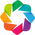

In [17]:
import pandas as pd
import holoviews as hv
from holoviews import opts
from bokeh.io import output_notebook

# Activate HoloViews with Bokeh backend
hv.extension('bokeh')
# output_notebook()

In [23]:
# Now I want to generate a function that given a source, will generate a plot like the one made by the code in the cell above
def plot_gantt(source):

    # Filter the data
    df_source = Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['source'] == source]

    # show only columns for targets, start_date and end_date
    singleSource = df_source[['target', 'start_date', 'end_date']].copy()

    # Assuming singleSource is your existing DataFrame
    # Ensure 'start_date' and 'end_date' columns are datetime
    singleSource['start_date'] = pd.to_datetime(singleSource['start_date'])
    singleSource['end_date'] = pd.to_datetime(singleSource['end_date'])

    # if there is no end_date, set it to the max start_date
    singleSource['end_date'] = singleSource['end_date'].fillna(singleSource['start_date'].max())

    # Create Segments for the Gantt chart
    segments = hv.Segments(singleSource, ['start_date', 'target', 'end_date', 'target'])

    # Customize plot options
    segments.opts(
        opts.Segments(height=900, width=800, show_grid=True, xrotation=45, ylabel='Target', xlabel='Date',
                      tools=['hover'], show_legend=False, title=f"Start beneficial ownership for {source}", line_width=10)
    )

    # # Set y-axis ticks and labels
    # yticks = hv.Dimension('target', values=singleSource['target'].unique())
    # segments = segments.redim.values(target=yticks)

    # Display Gantt chart
    return segments

In [24]:
plot_gantt('Sandra Young')

:Segments   [start_date,target,end_date,target]

In [25]:
plot_gantt('Cynthia Anderson')

:Segments   [start_date,target,end_date,target]

In [19]:
for source in moreThan10.index:
  print(source)

Sandra Young
Anna Davis
Cynthia Anderson
Kelsey Ortega
Breanna Price
Aaron Delgado
Joshua Kent
Melissa Davis
Jason Anderson
Joseph Brown
Alan Richardson
Wesley Phillips
Jennifer Gardner
Katie Evans
Zachary Taylor
Joseph Gentry
Alexandra Clay
Erica Ford
Anne Villanueva
Sydney Jones
Catherine Macias
Kenneth Gonzales
Sharon Moon
Erin Cisneros
Dana Moore
Isla Davis
James Erickson
Karen Walker
Krista Bennett
Monica Williams
Henry Cox
Stacy Olsen
Cathy Roberts
Deanna Wilson


In [20]:
# Generate plots for each source and store them in a list
plots = []
for source in moreThan10.index:
    plot = plot_gantt(source)
    plots.append(plot)

# Display all the generated plots
hv.Layout(plots).cols(1)

:Layout
   .Segments.I      :Segments   [start_date,target,end_date,target]
   .Segments.II     :Segments   [start_date,target,end_date,target]
   .Segments.III    :Segments   [start_date,target,end_date,target]
   .Segments.IV     :Segments   [start_date,target,end_date,target]
   .Segments.V      :Segments   [start_date,target,end_date,target]
   .Segments.VI     :Segments   [start_date,target,end_date,target]
   .Segments.VII    :Segments   [start_date,target,end_date,target]
   .Segments.VIII   :Segments   [start_date,target,end_date,target]
   .Segments.IX     :Segments   [start_date,target,end_date,target]
   .Segments.X      :Segments   [start_date,target,end_date,target]
   .Segments.XI     :Segments   [start_date,target,end_date,target]
   .Segments.XII    :Segments   [start_date,target,end_date,target]
   .Segments.XIII   :Segments   [start_date,target,end_date,target]
   .Segments.XIV    :Segments   [start_date,target,end_date,target]
   .Segments.XV     :Segments   [start_date,target,end_date,target]
   .Segments.XVI    :Segments   [start_date,target,end_date,target]
   .Segments.XVII   :Segments   [start_date,target,end_date,target]
   .Segments.XVIII  :Segments   [start_date,target,end_date,target]
   .Segments.XIX    :Segments   [start_date,target,end_date,target]
   .Segments.XX     :Segments   [start_date,target,end_date,target]
   .Segments.XXI    :Segments   [start_date,target,end_date,target]
   .Segments.XXII   :Segments   [start_date,target,end_date,target]
   .Segments.XXIII  :Segments   [start_date,target,end_date,target]
   .Segments.XXIV   :Segments   [start_date,target,end_date,target]
   .Segments.XXV    :Segments   [start_date,target,end_date,target]
   .Segments.XXVI   :Segments   [start_date,target,end_date,target]
   .Segments.XXVII  :Segments   [start_date,target,end_date,target]
   .Segments.XXVIII :Segments   [start_date,target,end_date,target]
   .Segments.XXIX   :Segments   [start_date,target,end_date,target]
   .Segments.XXX    :Segments   [start_date,target,end_date,target]
   .Segments.XXXI   :Segments   [start_date,target,end_date,target]
   .Segments.XXXII  :Segments   [start_date,target,end_date,target]
   .Segments.XXXIII :Segments   [start_date,target,end_date,target]
   .Segments.XXXIV  :Segments   [start_date,target,end_date,target]

In [26]:
source = 'Deanna Wilson'
Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['source'] == source]

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
541,2011-12-30T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,"Ross, Flowers and King",0,NaN
542,2026-12-17T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,Reed PLC,0,NaN
543,2026-06-27T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,"Barnes, Paul and Price",0,NaN
544,2013-08-04T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,Vaughn Ltd,0,NaN
545,2012-12-10T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,Johnson-Edwards,0,NaN
546,2028-08-22T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,"Mcdonald, Martin and Gonzalez",0,NaN
547,2025-07-26T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,"Hopkins, Mccoy and Guerrero",0,NaN
548,2033-01-14T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,Cooke-Garza,0,NaN
549,2009-08-27T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,Underwood-Phillips,0,NaN
550,2023-03-04T00:00:00,Event.Owns.BeneficialOwnership,Pelagia Alethea Mordoch,2035-01-01T00:00:00,2035-01-01T00:00:00,Existing Corporate Structure Data,Automatic Import,Deanna Wilson,"Gonzalez, King and Kim",0,NaN


## Only those with end_date
I think that it would be interesting to see only those with end_date, as it would be more interesting to see the time that the beneficial ownership lasted.

In [28]:
# is not na
withEnd = Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['end_date'].notna()]
withEnd

,start_date,type,_last_edited_by,_last_edited_date,_date_added,_raw_source,_algorithm,source,target,key,end_date
676,2032-10-01T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-08-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Jul '35,Manual Entry,Kelsey Ortega,Stephens-Lopez,0,2035-07-13T00:00:00
767,2034-11-29T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-08-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Jul '35,Manual Entry,Joseph Gentry,Stephens-Lopez,0,2035-07-13T00:00:00
858,2034-11-26T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-08-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Jul '35,Manual Entry,Cynthia Anderson,Stephens-Lopez,0,2035-07-13T00:00:00
949,2034-12-13T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-08-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Jul '35,Manual Entry,Anna Davis,Stephens-Lopez,0,2035-07-13T00:00:00
1041,2034-11-20T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-08-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Jul '35,Manual Entry,Katie Evans,Stephens-Lopez,0,2035-07-13T00:00:00
...,...,...,...,...,...,...,...,...,...,...,...
23526,2025-02-26T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-10-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Sep '35,Manual Entry,Anna Coleman,Scott-Sanchez,0,2035-09-24T00:00:00
23536,2029-01-14T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-04-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Mar '35,Manual Entry,Beverly Moore,Sexton Group,0,2035-03-18T00:00:00
24119,2033-03-24T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-11-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Oct '35,Manual Entry,Lauren King,"Velez, Yoder and Gill",0,2035-10-14T00:00:00
24190,2008-12-02T00:00:00,Event.Owns.BeneficialOwnership,Niklaus Oberon,2035-03-15T00:00:00,2035-01-01T00:00:00,Oceanus Corporations Monthly - Feb '35,Manual Entry,William Watts,"Walsh, Lee and Sandoval",0,2035-02-26T00:00:00


In [33]:
# group by source and count of targets
grouped = withEnd.groupby('source')['target'].count()

# sort by count of targets
grouped.sort_values(ascending=False, inplace=True)
grouped

source
Aaron Delgado           1
Michael Nguyen          1
Matthew Crawford PhD    1
Matthew Hess            1
Megan Miller            1
                       ..
Deborah Cardenas        1
David Waters            1
David Herrera           1
Daniel Shaffer          1
Zachary Taylor          1
Name: target, Length: 141, dtype: int64

In [42]:
max_end_date = Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['end_date'].notna()]['end_date'].max()
max_end_date

'2035-12-29T00:00:00'

In [43]:
def plot_gantt_end(source):
    # Filter the data
    df_source = Event_Owns_BeneficialOwnership[Event_Owns_BeneficialOwnership['source'] == source]

    # show only columns for targets, start_date and end_date
    singleSource = df_source[['target', 'start_date', 'end_date']].copy()

    # Ensure 'start_date' and 'end_date' columns are datetime
    singleSource['start_date'] = pd.to_datetime(singleSource['start_date'])
    singleSource['end_date'] = pd.to_datetime(singleSource['end_date'])

    # Fill missing end_date with the max start_date
    singleSource['end_date'] = singleSource['end_date'].fillna(singleSource['start_date'].max())

    # Filter out rows where end_date equals the max end_date
    singleSource = singleSource[singleSource['end_date'] != max_end_date]

    # Create Segments for the Gantt chart
    segments = hv.Segments(singleSource, ['start_date', 'target', 'end_date', 'target'])

    # Customize plot options
    segments.opts(
        opts.Segments(height=900, width=800, show_grid=True, xrotation=45, xlabel='Date',
                      tools=['hover'], show_legend=False, title=f"Start beneficial ownership for {source}", line_width=10)
    )

    # Return the Gantt chart
    return segments

In [41]:
for source in grouped.index:
    plot = plot_gantt_end(source)
    plots.append(plot)

NameError: name 'max_end_date' is not defined